# Megaline Plans Analytics

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Prepare the Data](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6. [**Prepare Call Data](#PrepareCallData)
7. [**Prepare Internet Data](#PrepareInternetData)
8. [**Prepare Message Data](#PrepareMessageData)
9. [**Prepare User Data](#PrepareUserData)
10. [**Calculation User's Overage](#CalculationOverage)
11. [**Calculation Revenue](#CalculationRevenue)
12.  [* Step 2: Conclusion](#Step2Conclusion)
13. [Step 3: Analyze the data](#AnalyzeData)
14.  [* Step 3: Conclusion](#Step3Conclusion)
15. [Step 4: Test the Hypotheses](#Step4Hypotheses)
16. [**Null Hypotheses 1](#NullHypotheses1)
17. [**Null Hypotheses 1 Conclusion:](#NullHypotheses1Conclusion)
18. [**Null Hypotheses 2](#NullHypotheses2)
19. [**NUll Hypotheses 2 Conclusion:](#NullHypotheses2Conclusion)
20.  [* Step 4: Conclusion](#Step4Conclusion)
21. [Step 5: Write an overall conclusion](#OverallConclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. .  |
|  **Main question of project**  |  Which of the plans brings in more revenue in order to adjust the advertising budget |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-scientist/courses/8379ed9f-b704-4f1c-9dad-6907efb24928/sprints/4249/topics/01e1acb8-80e6-4d68-9022-a08914dba234/lessons/e8470419-0985-4deb-ba06-b0b350198953/)    |
| **Datasets**             | [/datasets/megaline_calls.csv](https://code.s3.yandex.net/datasets/megaline_calls.csv)  |
|                          | [/datasets/megaline_internet.csv](https://code.s3.yandex.net/datasets/megaline_internet.csv) |
|                          | [/datasets/megaline_messages.csv](https://code.s3.yandex.net/datasets/megaline_messages.csv) |
|                          | [/datasets/megaline_plans.csv](https://code.s3.yandex.net/datasets/megaline_plans.csv) |
|                          | [/datasets/megaline_users.csv](https://code.s3.yandex.net/datasets/megaline_users.csv) |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [5]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [6]:
# connect all datasets:
df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
df_messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
df_plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')

In [7]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [8]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*100)
    
    print('Info:')
    display(df.info())
    print('-'*100)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include='object'))
    print('-'*100)
    
    print('Columns with nulls:')
    get_percent_of_na(df_calls, 2)
    print('-'*100)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')

In [9]:
# let's use get_info function for check information for all datasets:
get_info(df_calls)
get_info(df_internet)
get_info(df_messages)
get_info(df_plans)
get_info(df_users)

Head:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


----------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,id,call_date
count,137735,137735
unique,137735,351
top,1422_99,2018-12-27
freq,1,1091


----------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
----------------------------------------------------------------------------------------------------
Shape:
(137735, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


----------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,id,session_date
count,104825,104825
unique,104825,351
top,1422_99,2018-12-24
freq,1,851


----------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
----------------------------------------------------------------------------------------------------
Shape:
(104825, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


----------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

----------------------------------------------------------------------------------------------------
Describe:


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


,id,message_date
count,76051,76051
unique,76051,351
top,1160_49,2018-12-28
freq,1,702


----------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
----------------------------------------------------------------------------------------------------
Shape:
(76051, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


----------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

----------------------------------------------------------------------------------------------------
Describe:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


,plan_name
count,2
unique,2
top,surf
freq,1


----------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
----------------------------------------------------------------------------------------------------
Shape:
(2, 8)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


----------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

----------------------------------------------------------------------------------------------------
Describe:


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,Hoffman,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-18
freq,3,3,80,5,339,3


----------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
----------------------------------------------------------------------------------------------------
Shape:
(500, 8)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 



#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information. We can say that there are no missing values in the datasets. Very clean data.

### Step 2. Prepare the data <a name="PrepareData"></a>

#### To-Do List: <a name="Step2ToDoList"></a>

> - [X] Convert the data to the necessary types
- [X] Find and eliminate errors in the data
- [X] Explain what errors you found and how you removed them.

**For each user, find:**
> - [x] The number of calls made and minutes used per month
- [x] The number of text messages sent per month
- [x] The volume of data per month
- [x] The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [10]:
#get_id = np.vectorize(lambda x: re.sub('.*_', '' , x)) - under check. 

In [11]:
# change data types to datetime and split into day/month/year columns:
def get_info_date(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df

#### Prepare Call Data <a name="PrepareCallData"></a>

In [12]:
# let't check df_calls columns: 
df_calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls = get_info_date(df_calls)
df_calls['call_type'] = np.where(df_calls['duration'] == 0, 'Missed call', 'Connected call')
df_calls.head()

,id,user_id,call_date,duration,day,month,year,call_type
0,1000_93,1000,2018-12-27,8.52,Thursday,December,2018,Connected call
1,1000_145,1000,2018-12-27,13.66,Thursday,December,2018,Connected call
2,1000_247,1000,2018-12-27,14.48,Thursday,December,2018,Connected call
3,1000_309,1000,2018-12-28,5.76,Friday,December,2018,Connected call
4,1000_380,1000,2018-12-30,4.22,Sunday,December,2018,Connected call


#### Prepare Internet Data <a name="PrepareInternetData"></a>

In [14]:
# let's prepare additional columns with day/month/year for dataframe with internet traffic.
df_internet = get_info_date(df_internet)
# check results:
df_internet.head()

,id,user_id,session_date,mb_used,day,month,year
0,1000_13,1000,2018-12-29,89.86,Saturday,December,2018
1,1000_204,1000,2018-12-31,0.00,Monday,December,2018
2,1000_379,1000,2018-12-28,660.40,Friday,December,2018
3,1000_413,1000,2018-12-26,270.99,Wednesday,December,2018
4,1000_442,1000,2018-12-27,880.22,Thursday,December,2018


#### Prepare Message Data <a name="PrepareMessageData"></a>

In [15]:
# add additional columns for Messages Dataframe.
df_messages = get_info_date(df_messages)
df_messages.head()

,id,user_id,message_date,day,month,year
0,1000_125,1000,2018-12-27,Thursday,December,2018
1,1000_160,1000,2018-12-31,Monday,December,2018
2,1000_223,1000,2018-12-31,Monday,December,2018
3,1000_251,1000,2018-12-27,Thursday,December,2018
4,1000_255,1000,2018-12-26,Wednesday,December,2018


#### Prepare User Data <a name="PrepareUserData"></a>

In [16]:
# first check data view from Users dataframe.
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [17]:
# add new columns: registration date and terminate date:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [18]:
print(df_users['user_id'].nunique())
print(df_calls['user_id'].nunique())
print(df_internet['user_id'].nunique())
print(df_messages['user_id'].nunique())


500
481
489
402


In [19]:
# calls per user per month
calls_made = df_calls.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Calls Made'})

# minutes per user per month
min_spent = df_calls.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'Minutes Spent'})

# traffic per user per month
mb_used = df_internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'Mb Used'})

# messages per user per month
messages_sent = df_messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Messages Sent'})

In [20]:
# plan for each user
plan = df_users[['user_id','plan']]

# combined into one table
df_usage = pd.concat([calls_made, min_spent, mb_used, messages_sent], axis=1).reset_index().merge(plan,on='user_id')
# main notice. Amount of internet traffic still in Mb. 
df_usage.head(15)

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan
0,1000,December,16.0,116.83,1901.47,11.0,ultimate
1,1001,August,27.0,171.14,6919.15,30.0,surf
2,1001,December,56.0,392.93,19369.18,44.0,surf
3,1001,November,64.0,404.59,18504.30,36.0,surf
4,1001,October,65.0,374.11,22330.49,53.0,surf
5,1001,September,49.0,297.69,13314.82,44.0,surf
6,1002,December,47.0,363.24,14396.24,41.0,surf
7,1002,November,55.0,359.76,19345.08,32.0,surf
8,1002,October,11.0,54.13,6552.01,15.0,surf
9,1003,December,149.0,1041.00,27044.14,50.0,surf


In [21]:
# Saving new obtained dataframe as a csv file
df_usage.to_csv('usage_data.csv', index=False)

#### Calculation User's Overage <a name="CalculationOverage"></a>

In [22]:
# import all packages once again for not scroll to up. 
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [23]:
# Re-upload once again, if stopped in this point.
df_usage = pd.read_csv('usage_data.csv')
df_plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')

In [24]:
# let's check again missing values for new created table.
df_usage.isnull().sum()

user_id            0
month              0
Calls Made        35
Minutes Spent     35
Mb Used           16
Messages Sent    487
plan               0
dtype: int64

In [25]:
# prepare function to fill missing values. 
def fill_na(df):
    if df.isna().sum().sum() != 0: 
        df.fillna(0, inplace=True)
    return df

In [26]:
# fill missing values in new DataFrame.
fill_na(df_usage)

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan
0,1000,December,16.0,116.83,1901.47,11.0,ultimate
1,1001,August,27.0,171.14,6919.15,30.0,surf
2,1001,December,56.0,392.93,19369.18,44.0,surf
3,1001,November,64.0,404.59,18504.30,36.0,surf
4,1001,October,65.0,374.11,22330.49,53.0,surf
...,...,...,...,...,...,...,...
2288,1498,September,45.0,344.62,22827.28,0.0,surf
2289,1499,December,65.0,468.10,22059.21,0.0,surf
2290,1499,November,45.0,288.56,16813.83,0.0,surf
2291,1499,October,53.0,363.28,19492.43,0.0,surf


In [27]:
# let's see again to all plans from Megaline.
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [28]:
# check again df_usage columns:
df_usage.columns

Index(['user_id', 'month', 'Calls Made', 'Minutes Spent', 'Mb Used',
       'Messages Sent', 'plan'],
      dtype='object')

In [29]:
# function to calculate if a user is over plan usage for calls, minutes and internet traffic.
def calculate_overage(df, df_plan):
    
    # define new overage DataFrame for minutes, messages and traffic:
    over_minutes  = []
    over_messages = []
    over_traffic  = []
    
    # ultimate plan allowances: 
    ultimate_messages = 1000 # 1000 SMS
    ultimate_traffic  = 30720 # 30Gbytes traffic included.
    ultimate_minutes  = 3000 # 3000 minutes.
    
    # surf plan allowances:
    surf_messages = 50 # 50 SMS
    surf_traffic  = 15360 # 15Gbytes traffic included.
    surf_minutes  = 500
    
    for min_spent, mb_used, messages_sent, plan in zip(df['Minutes Spent'], df['Mb Used'], df['Messages Sent'], df['plan']):
        if plan == 'ultimate': # first branch - check Ultimate plan
            if min_spent <= ultimate_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-ultimate_minutes)
                
            if mb_used <= ultimate_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used-ultimate_traffic)
                
            if messages_sent <= ultimate_messages:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-ultimate_messages)
                
        else: # another branch - check Surf plan
            if min_spent <= surf_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-surf_minutes)
                
            if mb_used <= surf_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used-surf_traffic)
                
            if messages_sent <= surf_messages:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-surf_messages)
    # np.ceil.
    return np.ceil(over_minutes), np.ceil(over_traffic), np.ceil(over_messages)

In [30]:
df_usage['over_minutes'], df_usage['over_traffic'], df_usage['over_messages'] = calculate_overage(df_usage, df_plans)
df_usage.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4010.0,0.0
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3145.0,0.0
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6971.0,3.0


In [31]:
df_usage.isnull().sum()

user_id          0
month            0
Calls Made       0
Minutes Spent    0
Mb Used          0
Messages Sent    0
plan             0
over_minutes     0
over_traffic     0
over_messages    0
dtype: int64

#### Calculation Revenue <a name="CalculationRevenue"></a>

In [32]:
# let's see again usage table with new added columns:
df_usage.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4010.0,0.0
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3145.0,0.0
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6971.0,3.0


In [33]:
# function to calculate revenue for each user.
def calculation_revenue(df, df_plan):
    
    revenue  = []
    user_sum = 0

    #surf costs:
    surf_month_cost  = 20
    surf_minute_cost  = 0.03
    surf_message_cost = 0.03
    surf_1Gb_cost     = 10
    
    #ultimate costs:
    ultimate_month_cost   = 70
    ultimate_minute_cost  = 0.01
    ultimate_message_cost = 0.01
    ultimate_1Gb_cost     = 7
    
    for over_minutes, over_traffic, over_messages, plan in zip(df['over_minutes'], df['over_traffic'], df['over_messages'], df['plan']):
        if plan == 'ultimate':
            user_sum += ultimate_month_cost
            user_sum += ultimate_message_cost * over_messages
            user_sum += ultimate_1Gb_cost * (over_traffic / 1024) # we will calculate traffic in Gbytes
            user_sum += ultimate_minute_cost * over_minutes
        else:
            user_sum += surf_month_cost
            user_sum += surf_message_cost * over_messages
            user_sum += surf_1Gb_cost * (over_traffic / 1024) # we will calculate traffic in Gbytes
            user_sum += surf_minute_cost * over_minutes
        revenue.append(user_sum)
        user_sum = 0
    return revenue    

In [34]:
df_usage['revenue'] = calculation_revenue(df_usage, df_plans)
display(df_usage.head(20))
print('Mean revenue value:', df_usage['revenue'].mean())

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages,revenue
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0,70.000000
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0,20.000000
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4010.0,0.0,59.160156
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3145.0,0.0,50.712891
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6971.0,3.0,88.166172
5,1001,September,49.0,297.69,13314.82,44.0,surf,0.0,0.0,0.0,20.000000
6,1002,December,47.0,363.24,14396.24,41.0,surf,0.0,0.0,0.0,20.000000
7,1002,November,55.0,359.76,19345.08,32.0,surf,0.0,3986.0,0.0,58.925781
8,1002,October,11.0,54.13,6552.01,15.0,surf,0.0,0.0,0.0,20.000000
9,1003,December,149.0,1041.00,27044.14,50.0,surf,541.0,11685.0,0.0,150.341328


Mean revenue value: 61.953078629252026


#### Step 2: Conclusion <a name="Step2Conclusion"></a>

> * At this step, the main task was to use the current data and transform it to create new useful columns with information in order to subsequently analyze it and draw conclusions.

### Step 3. Analyze the data <a name="AnalyzeData"></a>

> - Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

In [35]:
# we will prepare separate ones for two tariff plans.
df_usage_surf     = df_usage.query('plan == "surf"')[['user_id', 'month', 'Minutes Spent', 'Mb Used', 'Messages Sent', 'revenue']]
df_usage_ultimate = df_usage.query('plan == "ultimate"')[['user_id', 'month', 'Minutes Spent', 'Mb Used', 'Messages Sent', 'revenue']] 

In [36]:
# sort for first view Surf plan:
display(df_usage_surf.sort_values(by='revenue', ascending=False).head())
# check main parameter for Surf plan:
df_usage_surf.describe()

,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
1755,1379,December,1045.24,70931.59,126.0,581.355312
569,1121,December,0.00,66863.89,97.0,524.378750
1357,1292,December,132.65,52034.66,0.0,378.154297
1356,1292,August,304.67,51809.35,0.0,375.957031
1126,1240,August,1038.88,49950.58,15.0,373.972734


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,404.762390,16558.283490,31.159568,57.301131
std,139.227939,221.664397,8013.513327,33.566717,53.738511
min,1001.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,255.470000,11986.520000,3.000000,20.000000
50%,1245.000000,401.760000,16829.310000,24.000000,36.710000
75%,1358.000000,543.680000,20999.610000,47.000000,76.855469
max,1499.000000,1431.220000,70931.590000,266.000000,581.355312


In [37]:
display(df_usage_ultimate.sort_values(by='revenue', ascending=False).head())
df_usage_ultimate.describe()

,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
103,1028,October,34.02,46595.33,73.0,178.527344
2239,1490,December,347.35,46215.51,0.0,175.929688
135,1038,December,444.66,45020.31,113.0,167.760742
102,1028,November,64.74,42952.59,77.0,153.624023
95,1028,August,71.55,40388.21,74.0,136.096680


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,406.193083,17214.699694,37.551389,72.116292
std,150.915644,227.246499,7851.897435,34.767179,10.769582
min,1000.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,246.290000,12666.955000,7.000000,70.000000
50%,1241.500000,398.585000,16858.340000,30.000000,70.000000
75%,1401.000000,532.227500,21014.527500,61.000000,70.000000
max,1497.000000,1292.090000,46595.330000,166.000000,178.527344


In [51]:
# function for created histograms - first draft.
def plot_histograms(df1,df2,column,bins_1,bins_2):
    ax = df1.hist(column=column, density=True, bins=bins_1, figsize=(16,5))
    df2.hist(column=column, density=True, bins=bins_2, alpha=0.4, ax=ax)
    plt.legend(['surf_plan', 'ultimate_plan'])
    plt.xlabel(column)
    plt.show()

In [75]:
# another type of function for create 1 types of histograms in one chart:
def plot_histograms_1(df1, df2, column, bins_1, bins_2):
    fig, ax = plt.subplots(figsize=(16,5))
    df1.hist(column=column, ax=ax, density=True, bins = bins_1)
    df2.hist(column=column, ax=ax, density=True, bins = bins_2)
    plt.title(column)
    plt.xlabel(column)
    plt.legend(['Surf,' + ' ' +column, 'Ultimate,' + ' ' +column])
    plt.show()

In [94]:
# another type of function for create 2 types of histograms in one chart:
def plot_histograms_2(df1, df2, column, bins_1, bins_2, lim_1, lim_2):
    fig, ax = plt.subplots(figsize=(16,5))
    df1.hist(column=column, ax=ax, density=True, bins = bins_1, range   = (lim_1, lim_2))
    df2.hist(column=column, ax=ax, density=True, bins = bins_2, range   = (lim_1, lim_2))
    plt.title(column)
    plt.xlabel(column)
    plt.legend(['Surf,' + ' ' +column, 'Ultimate,' + ' ' +column])
    plt.show()

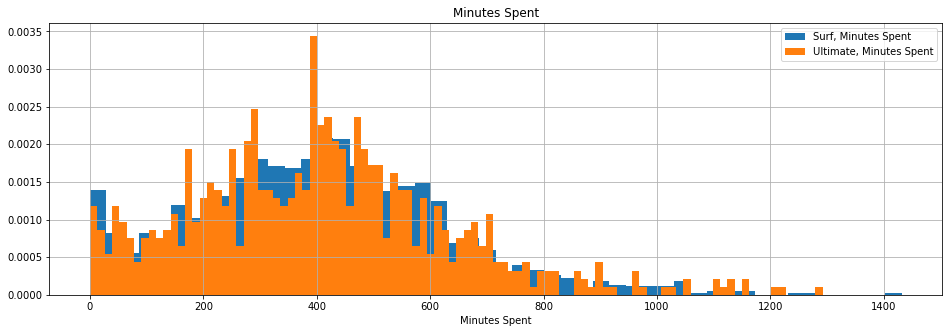

In [95]:
plot_histograms_1(df_usage_surf, df_usage_ultimate, 'Minutes Spent', 50, 100)

> * **Chart Description:** The main number of minutes spent on both tariff plans is the same and ranges from 200 to 600 minutes.

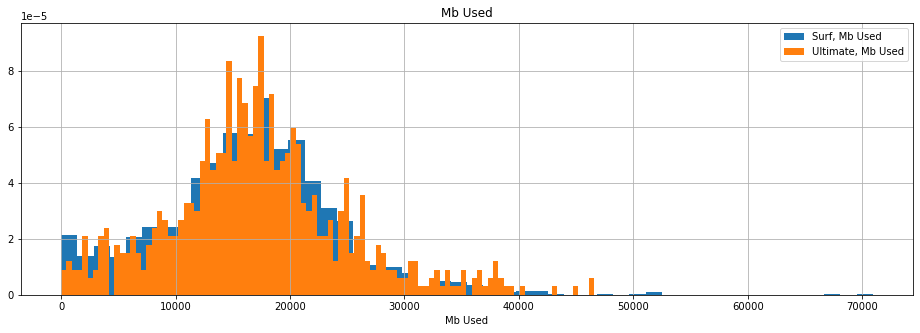

In [90]:
plot_histograms_1(df_usage_surf, df_usage_ultimate, 'Mb Used', 50, 100)

> * **Chart Description:** Users of both tariffs usually use the same amount of traffic. From 1 to 2 gigabytes.

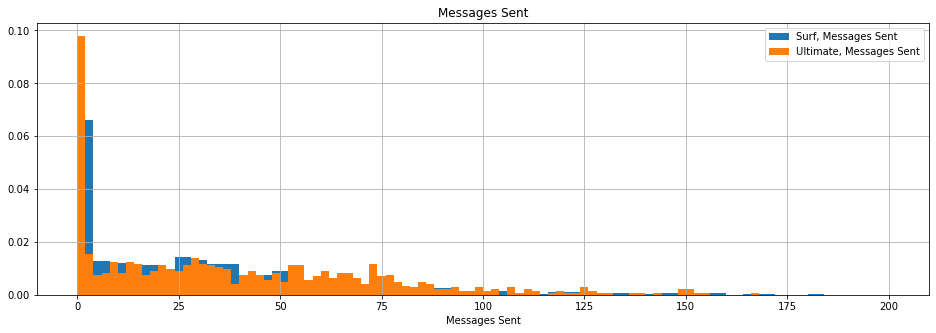

In [96]:
plot_histograms_2(df_usage_surf, df_usage_ultimate, 'Messages Sent', 50, 100, 0, 200)

> * **Description:** The number of messages sent is between 0 and 50 messages. From 50 to 100, the number of sent messages is higher on the Ultimate plan.

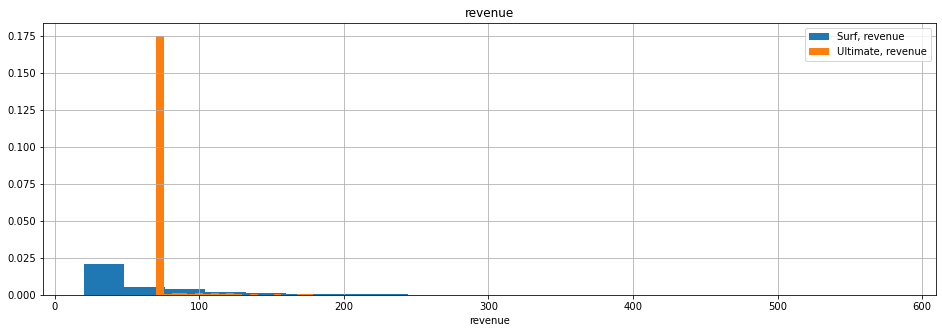

In [97]:
plot_histograms_1(df_usage_surf, df_usage_ultimate, 'revenue', 20, 20)

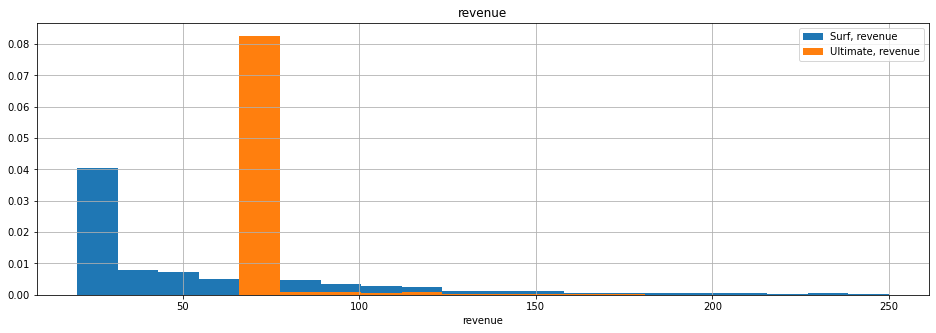

In [99]:
plot_histograms_2(df_usage_surf, df_usage_ultimate, 'revenue', 20, 20, 20, 250)

> * **Description:**
* The main income distribution on the Ultimate tariff plan is fixed at 70 dollars per month. This is the monthly cost of this tariff plan. But there are also separate groups of users who spend more on this tariff plan. The maximum income is 178.5 dollars per month.
* The main income distribution on the Surf tariff plan is fixed at 20 dollars per month. This is the monthly cost of this tariff plan. But there are also separate groups of users who spend more on this tariff plan. The maximum income outliers on level 581.4 dollars per month.

In [52]:
# add new hierarchy with all months:
month_hierarchy = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November', 'December']
# let's add new column with months:
df_usage['month'] = pd.Categorical(df_usage['month'], month_hierarchy)
df_usage.dtypes

user_id             int64
month            category
Calls Made        float64
Minutes Spent     float64
Mb Used           float64
Messages Sent     float64
plan               object
over_minutes      float64
over_traffic      float64
over_messages     float64
revenue           float64
dtype: object

In [53]:
group_month_revenue = df_usage.groupby(['plan','month']).agg({'Minutes Spent':'sum', 'Mb Used':'sum','Messages Sent':'sum', 'revenue':'sum'})
display(group_month_revenue)

Minutes Spent     Mb Used  Messages Sent       revenue
plan     month                                                            
surf     January           385.68     9749.72           21.0     40.000000
         February         2527.66   109609.59          108.0    297.090000
         March            7152.31   306945.12          351.0   1002.419453
         April           16619.00   599210.15          870.0   1939.150703
         May             29033.10  1073099.33         1849.0   3492.206797
         June            39499.26  1484248.33         2454.0   4454.952188
         July            51367.31  2030815.67         3271.0   7160.620937
         August          62721.48  2720843.68         4662.0   9826.451484
         September       75852.46  3218737.67         5968.0  10656.431641
         October         96149.09  4102786.41         8020.0  14611.924453
         November       113086.75  4624009.00         9165.0  15547.878125
         December       142297.14  5766125.26        12275.0  21105.553047
ultimate January           732.65    27672.37           62.0    280.000000
         February         2659.03   119901.66          151.0    490.000000
         March            3428.42   219858.22          243.0    880.721680
         April            6646.67   338554.75          463.0   1528.208008
         May             11126.28   482109.99          931.0   2044.957031
         June            16441.12   720882.29         1379.0   3359.425781
         July            23822.27   964339.92         1937.0   4239.176758
         August          28206.51  1264845.13         2732.0   5160.305664
         September       35542.71  1459408.78         3259.0   6175.879883
         October         45067.81  1866930.66         4181.0   7641.744141
         November        53400.65  2163278.04         4903.0   9093.375977
         December        65384.90  2766801.97         6796.0  11029.935547

In [54]:
# write new function for create plot:
def plot_dataframe(group_df, group, column, title):
    plt.figure(figsize=(16,5))
    group_df.xs(group[0])[column].plot()
    group_df.xs(group[1])[column].plot()
    plt.title(title)
    plt.legend(['Surf,' + ' ' +column, 'Ultimate,' + ' ' +column])
    plt.show()

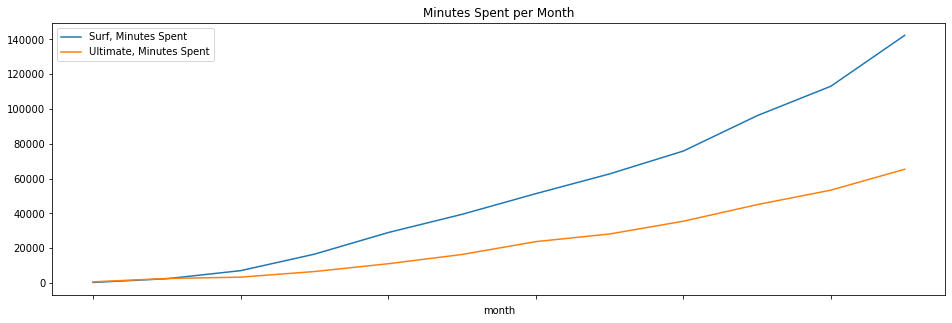

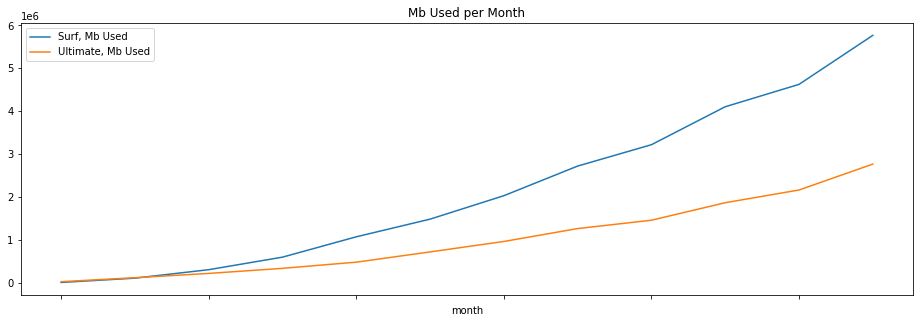

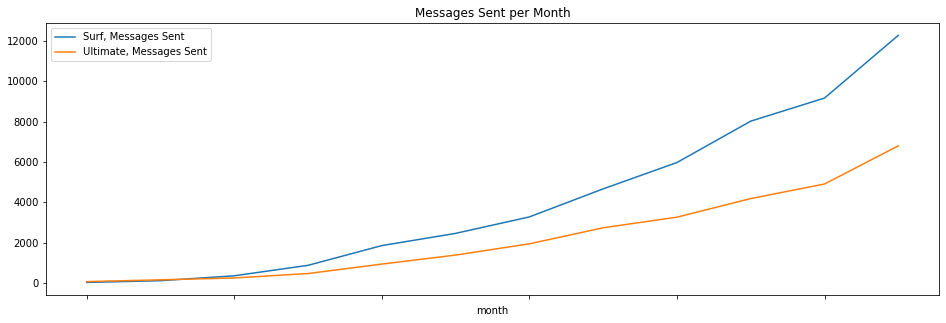

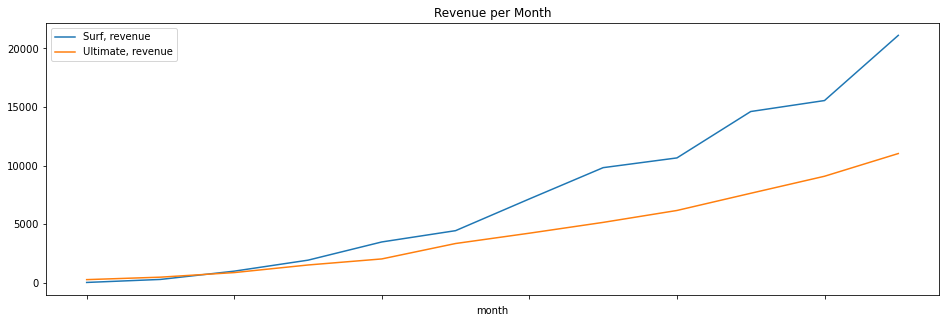

In [55]:
plot_dataframe(group_month_revenue,['surf','ultimate'], 'Minutes Spent', 'Minutes Spent per Month')
plot_dataframe(group_month_revenue,['surf','ultimate'], 'Mb Used', 'Mb Used per Month')
plot_dataframe(group_month_revenue,['surf','ultimate'], 'Messages Sent', 'Messages Sent per Month')
plot_dataframe(group_month_revenue,['surf','ultimate'], 'revenue', 'Revenue per Month')

#### Step 3: Conclusion:<a name="Step3Conclusion"></a>

> * The number of minutes spent, the volume of traffic, sent messages and revenue from the tariff coincide at the very beginning of the month for both tariff plans - Surf and Ultimate.
* But by the end of the month, the same indicators for different tariff plans change. On the Surf plan, the amount of user costs increases in total. Thus, the company's revenue from this tariff plan increases.

### Step 4. Test the Hypotheses <a name="Step4Hypotheses"></a>

> - [x] The average revenue from users of Ultimate and Surf calling plans differs.
- [X] The average revenue from users in NY-NJ area is different from that of the users from other regions.

**Explain:**

> - [X] How you formulated the null and alternative hypotheses.
- [X] What criterion you used to test the hypotheses and why.

#### Null Hypotheses 1: <a name="NullHypotheses1"></a>

* The first Null Hypotheses 1: 

> Average revenue from users of Ultimate and Surf calling plans NOT DIFFERENT.

* Alternative Hypotheses 1:

> Average revenue from users of Ultimate and Surf calling plans DIFFERENT.

In [68]:
# first need to prepare patterns: for SURF and ULTIMATE plans:
sample_surf     = df_usage.groupby(['plan'])['revenue'].get_group('surf')
sample_ultimate = df_usage.groupby(['plan'])['revenue'].get_group('ultimate')

print('Mean value for Surf Plan:', sample_surf.mean())
print('Mean value for Ultimate Plan:', sample_ultimate.mean()) 

Mean value for Surf Plan: 57.30113085068331
Mean value for Ultimate Plan: 72.11629231770833


In [65]:
# define function for check hypotheses:
def test_hypotheses(pattern_1, pattern_2):
    alpha   = .05
    results = st.ttest_ind(pattern_1, pattern_2)

    print('pvalue:', results.pvalue)
    print('alpha:', alpha)
    if results.pvalue < alpha:
        print('Decision: We reject the null hypotheses')
    else:
        print('Decision: We cannot reject the null hypotheses')

In [66]:
# for check hypotheses upload patterns for Surf and Ultimate plans:
test_hypotheses(sample_surf, sample_ultimate)

pvalue: 3.1830477744750944e-13
alpha: 0.05
Decision: We reject the null hypotheses


#### Null Hypotheses 1 Conclusion: <a name="NullHypotheses1Conclusion"></a>

> * Based on the fact that the Null hypothesis was **REJECTED**, it can be **CONFERMED** that the alternative hypothesis that "the average revenue from users of Ultimate and Surf calling plans is **DIFFERENT**"

#### Null Hypotheses 2: <a name="NullHypotheses2"></a>

* The first Null Hypotheses 2: 

> The average revenue from users in NY-NJ area is NOT DIFFERENT from that of the users from other regions.

* Alternative Hypotheses 2:

> The average revenue from users in NY-NJ area is DIFFERENT from that of the users from other regions.

In [69]:
# first need to prepare patterns for NY-NJ area and other regions.
# add condition expression for NY-NJ area.
NY_NJ_users_bool = df_users['city'].apply(lambda x: True if 'NY-NJ' in x else False)
NY_NJ_users      = df_users[NY_NJ_users_bool]['user_id'].values.tolist()

# create new df for NY-NJ area and other regions.
sample_NY_NJ     = df_usage[df_usage['user_id'].isin(NY_NJ_users)]['revenue']
sample_other     = df_usage[~df_usage['user_id'].isin(NY_NJ_users)]['revenue']

print('Mean value for NY-NJ area:', sample_NY_NJ.mean())
print('Mean value for other regions:', sample_other.mean())

Mean value for NY-NJ area: 57.19647971236738
Mean value for other regions: 62.88900649546578


In [70]:
test_hypotheses(sample_NY_NJ, sample_other)

pvalue: 0.026135219715942206
alpha: 0.05
Decision: We reject the null hypotheses


#### Null Hypotheses 2 Conclusion: <a name="NullHypotheses2Conclusion"></a>

> * Based on the fact that the Null hypothesis was **REJECTED**, it can be **CONFERMED** that the alternative hypothesis that "the average revenue from users in NY-NJ area is **DIFFERENT** from that of the users from other regions"

### Step 5. Write an overall conclusion <a name="OverallConclusion"></a>

> * The graphs built in the 3rd step show that the Surf tariff plan brings more revenue to the company than the Ultimate tariff plan.
* Also, hypothesis testing shows that tariff plans give different incomes.

Quetion for reviewer: what resourses better to read how write conclusion. 